In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv ("ratings_Clothing_Shoes_and_Jewelry.csv")
df.head()

,A2XVJBSRI3SWDI,0000031887,5.0,1383523200
0,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
1,A2R3K1KX09QBYP,0000031887,2.0,1361059200
2,A19PBP93OF896,0000031887,1.0,1363824000
3,A1P0IHU93EF9ZK,0000031887,4.0,1390435200
4,A3Q6CTO56DJ8UZ,0000031887,4.0,1268697600


In [3]:
df.columns = ['userid', 'productid', 'rating', 'timestamp']

In [4]:
df.head()

,userid,productid,rating,timestamp
0,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
1,A2R3K1KX09QBYP,0000031887,2.0,1361059200
2,A19PBP93OF896,0000031887,1.0,1363824000
3,A1P0IHU93EF9ZK,0000031887,4.0,1390435200
4,A3Q6CTO56DJ8UZ,0000031887,4.0,1268697600


In [5]:
df.shape

(5748919, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748919 entries, 0 to 5748918
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userid     object 
 1   productid  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ MB


In [7]:
#Dropping the timestamp column
df.drop(['timestamp'], axis=1, inplace = True)
df.head()

,userid,productid,rating
0,A2G0LNLN79Q6HR,0000031887,4.0
1,A2R3K1KX09QBYP,0000031887,2.0
2,A19PBP93OF896,0000031887,1.0
3,A1P0IHU93EF9ZK,0000031887,4.0
4,A3Q6CTO56DJ8UZ,0000031887,4.0


In [8]:
#Checking for null values
df.isna().sum()

userid       0
productid    0
rating       0
dtype: int64

In [9]:
#Checking for duplicates
rating_combination = ['userid', 'productid']
df[df.duplicated(subset=rating_combination, keep=False)].sort_values(rating_combination).head()

,userid,productid,rating


In [10]:
#Check the count of unique users and unique products
print(df['userid'].nunique())


3117268


In [11]:
#Number of unique products
print(df['productid'].nunique())

1136004


In [12]:
df['rating'].describe()

count    5.748919e+06
mean     4.144679e+00
std      1.233104e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [13]:
# Check the distribution of ratings 
print('Count of observations in each ratings:')
df.rating.value_counts()

Count of observations in each ratings:


5.0    3303449
4.0    1120583
3.0     574597
1.0     396523
2.0     353767
Name: rating, dtype: int64

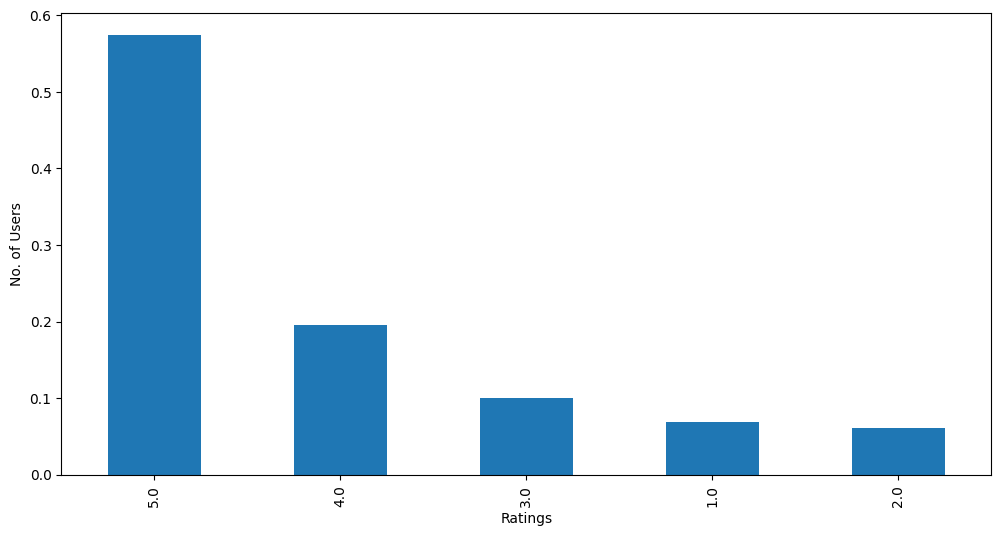

In [14]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('No. of Users')
plt.show()

In [15]:
#Top 10 users with most number of rating
most_rated = df.groupby('userid').size().sort_values(ascending = False)[:10]
most_rated

userid
A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
A2J4XMWKR8PPD0    256
A2EA0JE6LV4BXH    249
A2GA55P7WGHJCP    240
A1XQ0F01CF84Y3    225
A29BPMJI0ZYH4H    197
dtype: int64

In [16]:
least_rated = df.groupby('userid').size().sort_values(ascending = True)[:10]
least_rated

userid
A000008615DZQRRI946FO    1
A39NHWRT04N6KQ           1
A39NI0FS63CQ28           1
A39NI4NAMU8Q90           1
A39NI5DLRB306C           1
A39NIHHIV1YB5I           1
A39NIIUZYLV875           1
A39NIL48689N78           1
A39NIPDP99E6BO           1
A39NIYCJLGWPQ            1
dtype: int64

In [17]:
# Find the density of the rating matrix
print('Total observed ratings in the dataset  :', len(df))
possible_num_of_ratings = df.userid.nunique() * df.productid.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(df) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 5748919
Total ratings possible for the dataset : 3541228917072
Density of the dataset                 : 0.00016%


In [18]:
#only keeping the users who have given 40 or more ratings
counts = df['userid'].value_counts()
counts
df_final = df[df['userid'].isin(counts[counts >= 40].index)]

In [19]:
print('Total observed ratings in the dataset  :', len(df_final))
possible_num_of_ratings = df_final.userid.nunique() * df_final.productid.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(df_final) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 76302
Total ratings possible for the dataset : 84386980
Density of the dataset                 : 0.09042%


In [20]:
# Calculate the increase in density
print('The density of the data increased by {:4.2f}%'.format((0.09042-0.00016)/0.00016))

The density of the data increased by 564.12%


In [21]:
print(df_final.shape)
print(df_final['userid'].nunique())
print(df_final['productid'].nunique())

(76302, 3)
1292
65315


In [22]:
df_final

,userid,productid,rating
43,A1RLQXYNCMWRWN,0000031887,5.0
152,AJ6B83I4YJHYW,0000031887,5.0
444,A1F7YU6O5RU432,1608299953,5.0
466,A1R377IPZOKLMM,1608299953,5.0
600,AN81JUYW2SL24,1617160377,4.0
...,...,...,...
5748886,A3PN3LJGOHDDYB,B00LSTNH7U,5.0
5748887,A3PN3LJGOHDDYB,B00LSTZKZ2,5.0
5748900,A3PN3LJGOHDDYB,B00LT05HAS,5.0
5748902,A1H04CRIJ2ASD6,B00LU0ZXJM,5.0


In [23]:
final_ratings_matrix_product = df_final.pivot(index = 'productid', columns ='userid', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix_product.shape)

Shape of final_ratings_matrix:  (65315, 1292)


In [24]:
final_ratings_matrix = df_final.pivot(index = 'userid', columns ='productid', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (1292, 65315)


In [25]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

given_num_of_ratings =  76302


In [26]:
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

possible_num_of_ratings =  84386980


In [27]:
final_ratings_matrix

productid,0000031887,1608299953,1617160377,500000003X,8742245117,B00001T38R,B00001T38Y,B00001TQ34,B00001W0J3,B000034DKV,...,B00LK09U3M,B00LK0IQGY,B00LLHU588,B00LMH3SHW,B00LMQCBVC,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
userid,,,,,,,,,,,,,,,,,,,,,
A104SG9QZ92UAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1084V41BP7RDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10OZSMV7HOTCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10QCZUQ53TNRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10VVD2S6W6ICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ9VR9ESKVJEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZB0AM0LMJNDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZC097NSZCUQ8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

In [29]:
final_ratings_matrix

productid,0000031887,1608299953,1617160377,500000003X,8742245117,B00001T38R,B00001T38Y,B00001TQ34,B00001W0J3,B000034DKV,...,B00LK09U3M,B00LK0IQGY,B00LLHU588,B00LMH3SHW,B00LMQCBVC,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.neighbors import NearestNeighbors

k = 5

model = NearestNeighbors(n_neighbors=k , metric='cosine')
model.fit(final_ratings_matrix)

distances, indices = model.kneighbors(final_ratings_matrix)


In [31]:
indices

array([[   0,  887, 1078,  350, 1064],
       [   1,  442,  176,  813, 1169],
       [   2, 1234, 1156,  206,  348],
       ...,
       [1289,  539, 1195, 1097,   55],
       [1290, 1172,  327,   96,  848],
       [1291, 1122,   19,  892,  914]])

In [32]:
def get_recommendations(user_index, num_recommendations=5):
    # Get the indices of k-nearest neighbors
    neighbor_indices = indices[user_index, 1:]

    average_ratings = final_ratings_matrix.loc[neighbor_indices].mean(axis=0)

    # Find products that the user has not interacted with
    user_products = final_ratings_matrix.columns[final_ratings_matrix.loc[user_index] > 0]
    neighbor_products = set(final_ratings_matrix.columns[final_ratings_matrix.iloc[neighbor_indices].sum(axis=0) > 0])
    recommendations = list(neighbor_products.difference(user_products))

    final_product_recommendations=[]

    for j in recommendations:
        product_ratings=[]
        for i in neighbor_indices.tolist()[1:]:
            data_point= final_ratings_matrix.loc[i,j]
            if data_point>0:
                product_ratings.append(data_point)
        if len(product_ratings)>0:
            final_product_recommendations.append((j, sum(product_ratings)/len(product_ratings)))

    avg_ratings=[]
    final_list=[]
    for d in range(len(final_product_recommendations)):
        avg_ratings.append(final_product_recommendations[d][1])
        if final_product_recommendations[d][1]> sum(avg_ratings)/len(avg_ratings):
            final_list.append(final_product_recommendations[d][0])
    
    return final_list[:5]

    

In [37]:
user_index_to_recommend = 75
recommended_products = get_recommendations(user_index_to_recommend)
print(f"Recommended products for user {user_index_to_recommend}: {recommended_products}")

Recommended products for user 75: ['B00HNYALX2', 'B00DDCN0WM', 'B007MO5YH6', 'B00APUI9EE', 'B008B63UXE']
